### Importing the modules

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


#### load the data

In [2]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [6]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

#### Train Test Split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Age QQ plot')

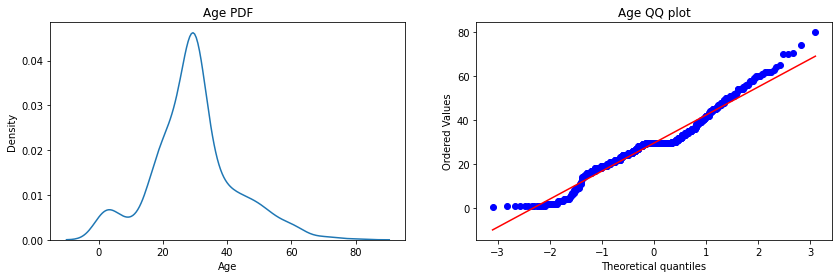

In [9]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(X_train["Age"],ax=ax[0])
ax[0].set_title("Age PDF")
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age QQ plot")

Text(0.5, 1.0, 'Fare QQ plot')

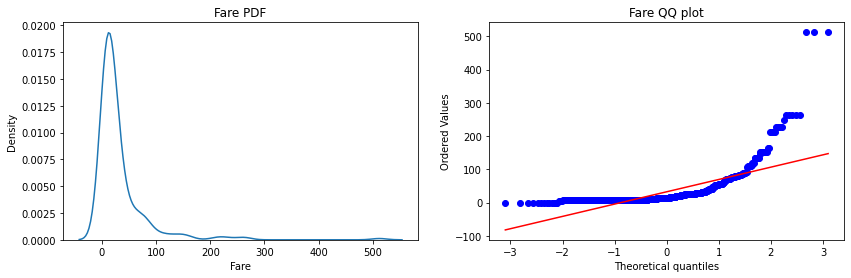

In [10]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(X_train["Fare"],ax=ax[0])
ax[0].set_title("Fare PDF")
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare QQ plot")

#### Training the model

In [11]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [12]:
lr.fit(X_train,y_train)
dc.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dc = dc.predict(X_test)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.6480446927374302
Accuracy of DT 0.659217877094972


#### Applying log function using Function Transformer

In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [16]:
lr.fit(X_train_transformed,y_train)
dc.fit(X_train_transformed,y_train)

y_pred_lr = lr.predict(X_test_transformed)
y_pred_dc = dc.predict(X_test_transformed)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.6871508379888268


In [17]:
X_transformed = trf.fit_transform(X)

lr = LogisticRegression()
dc = DecisionTreeClassifier()

print("Accuracy of LR",np.mean(cross_val_score(lr,X_transformed,y,scoring="accuracy",cv=10)))
print("Accuracy of DT",np.mean(cross_val_score(dc,X_transformed,y,scoring="accuracy",cv=10)))

Accuracy of LR 0.678027465667915
Accuracy of DT 0.6577403245942571


#### Fare After log vs Before log

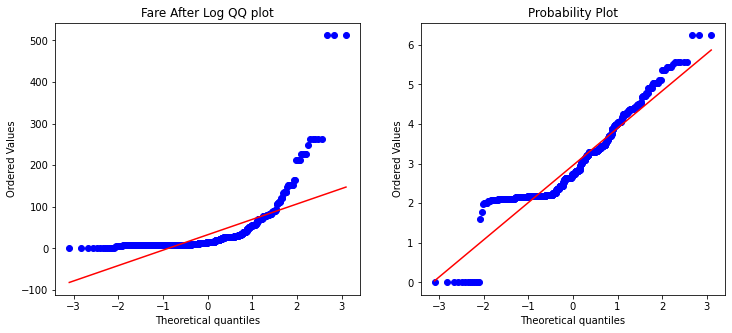

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Fare Before Log QQ plot")
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare After Log QQ plot")
plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist="norm",plot=plt)

plt.show()

#### Age After log vs Before log

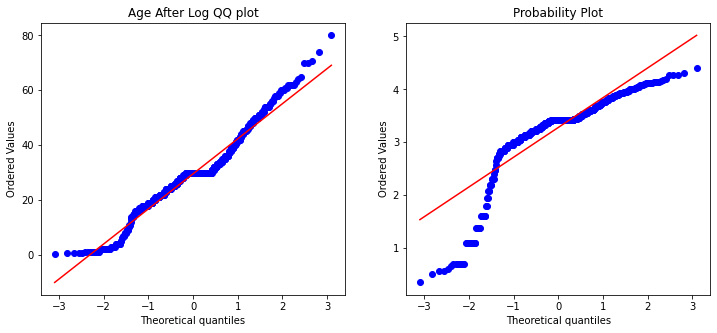

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Age Before Log QQ plot")
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age After Log QQ plot")
plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist="norm",plot=plt)

plt.show()

#### Applying log function on Fare column only

In [20]:
trf2 = ColumnTransformer([
    ("log",FunctionTransformer(np.log1p),["Fare"])],
   remainder="passthrough")

In [21]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [22]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [23]:
lr.fit(X_train_transformed2,y_train)
dc.fit(X_train_transformed2,y_train)

y_pred_lr = lr.predict(X_test_transformed2)
y_pred_dc = dc.predict(X_test_transformed2)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.6703910614525139
Accuracy of DT 0.664804469273743


#### Applying Square Transformation

In [24]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [25]:
X_train_square = X_train**2
X_train_square

,Age,Fare
331,2070.250000,812.250000
733,529.000000,169.000000
382,1024.000000,62.805625
704,676.000000,61.688458
813,36.000000,978.125625
...,...,...
106,441.000000,58.522500
270,882.037589,961.000000
860,1681.000000,199.044129
435,196.000000,14400.000000


In [26]:
X_test_square = X_test**2
X_test_square

,Age,Fare
709,882.037589,232.434418
439,961.000000,110.250000
840,400.000000,62.805625
720,36.000000,1089.000000
39,196.000000,126.375819
...,...,...
433,289.000000,50.765625
773,882.037589,52.200625
25,1444.000000,985.175156
84,289.000000,110.250000


In [27]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [28]:
lr.fit(X_train_square,y_train)
dc.fit(X_train_square,y_train)

y_pred_lr = lr.predict(X_test_square)
y_pred_dc = dc.predict(X_test_square)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.6089385474860335
Accuracy of DT 0.6703910614525139


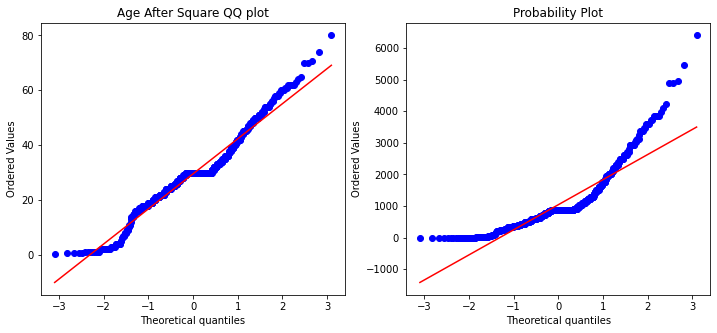

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Age Before Square QQ plot")
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age After Square QQ plot")
plt.subplot(122)
stats.probplot(X_train_square["Age"],dist="norm",plot=plt)

plt.show()

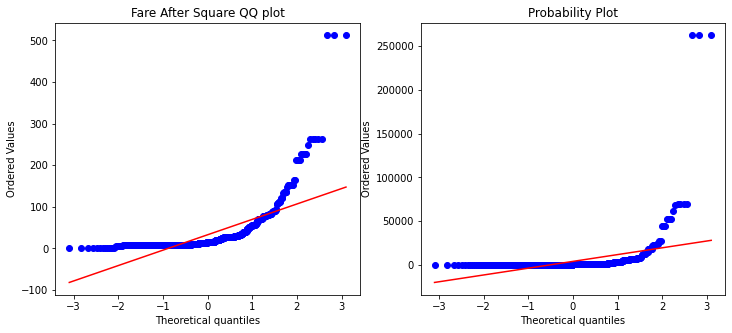

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Fare Before Square QQ plot")
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare After Square QQ plot")
plt.subplot(122)
stats.probplot(X_train_square["Fare"],dist="norm",plot=plt)

plt.show()

#### Applying Square Root Transformation

In [31]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [32]:
X_train_square_root = np.sqrt(X_train)
X_train_square_root

,Age,Fare
331,6.745369,5.338539
733,4.795832,3.605551
382,5.656854,2.815138
704,5.099020,2.802535
813,2.449490,5.592406
...,...,...
106,4.582576,2.765863
270,5.449690,5.567764
860,6.403124,3.756102
435,3.741657,10.954451


In [33]:
X_test_square_root = np.sqrt(X_test)
X_test_square_root

,Age,Fare
709,5.449690,3.904587
439,5.567764,3.240370
840,4.472136,2.815138
720,2.449490,5.744563
39,3.741657,3.352864
...,...,...
433,4.123106,2.669270
773,5.449690,2.687936
25,6.164414,5.602455
84,4.123106,3.240370


In [34]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [35]:
lr.fit(X_train_square_root,y_train)
dc.fit(X_train_square_root,y_train)

y_pred_lr = lr.predict(X_test_square_root)
y_pred_dc = dc.predict(X_test_square_root)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.6703910614525139
Accuracy of DT 0.6815642458100558


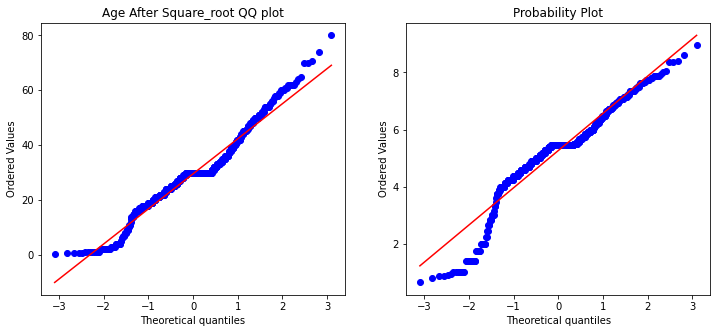

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Age Before Square_root QQ plot")
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age After Square_root QQ plot")
plt.subplot(122)
stats.probplot(X_train_square_root["Age"],dist="norm",plot=plt)

plt.show()

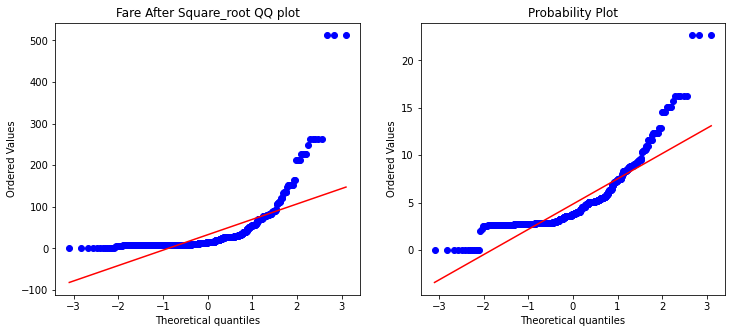

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Fare Before Square_root QQ plot")
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare After Square_root QQ plot")
plt.subplot(122)
stats.probplot(X_train_square_root["Fare"],dist="norm",plot=plt)

plt.show()

#### Applying Reciprocal Transformation

In [38]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [39]:
X_train_reciprocal = 1/(X_train+0.0001)
X_train_reciprocal

,Age,Fare
331,0.021978,0.035088
733,0.043478,0.076922
382,0.031250,0.126181
704,0.038461,0.127319
813,0.166664,0.031974
...,...,...
106,0.047619,0.130717
270,0.033671,0.032258
860,0.024390,0.070880
435,0.071428,0.008333


In [40]:
X_test_reciprocal = 1/(X_test+0.0001)
X_test_reciprocal

,Age,Fare
709,0.033671,0.065591
439,0.032258,0.095237
840,0.050000,0.126181
720,0.166664,0.030303
39,0.071428,0.088954
...,...,...
433,0.058823,0.140349
773,0.033671,0.138406
25,0.026316,0.031860
84,0.058823,0.095237


In [41]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()

In [42]:
lr.fit(X_train_reciprocal,y_train)
dc.fit(X_train_reciprocal,y_train)

y_pred_lr = lr.predict(X_test_reciprocal)
y_pred_dc = dc.predict(X_test_reciprocal)

print("Accuracy of LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy of DT",accuracy_score(y_test,y_pred_dc))

Accuracy of LR 0.5921787709497207
Accuracy of DT 0.6927374301675978


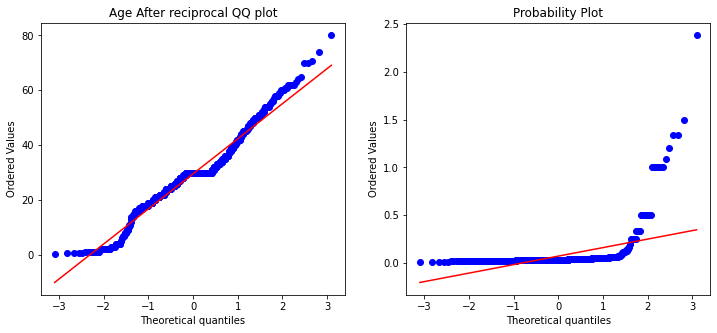

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Age Before reciprocal QQ plot")
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age After reciprocal QQ plot")
plt.subplot(122)
stats.probplot(X_train_reciprocal["Age"],dist="norm",plot=plt)

plt.show()

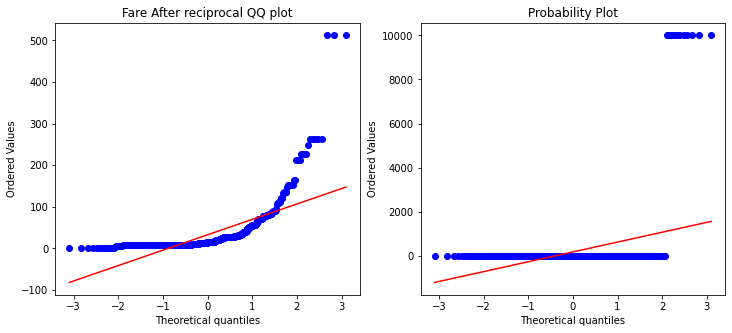

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Fare Before reciprocal QQ plot")
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare After reciprocal QQ plot")
plt.subplot(122)
stats.probplot(X_train_reciprocal["Fare"],dist="norm",plot=plt)

plt.show()